In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import pickle



In [10]:
df=pd.read_csv("D:\\VCodez\\final vcodez project\\dataset\\top_clv_customers.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,last_purchase_scaled,CLV,CLV_tier
0,265,63,Male,142287,77,10,44,Clothing,785.29,0.785494,49176871.61,Very High
1,532,19,Male,146165,38,9,45,Home & Garden,819.92,0.820133,48549283.57,Very High
2,249,54,Female,134743,98,9,42,Sports,894.21,0.894443,45556512.07,Very High
3,239,64,Female,124599,41,9,41,Groceries,924.18,0.924420,42502103.06,Very High
4,593,62,Female,148501,41,9,32,Sports,980.47,0.980725,41943928.76,Very High


In [11]:
df.info

<bound method DataFrame.info of      id  age  gender  income  spending_score  membership_years  \
0   265   63    Male  142287              77                10   
1   532   19    Male  146165              38                 9   
2   249   54  Female  134743              98                 9   
3   239   64  Female  124599              41                 9   
4   593   62  Female  148501              41                 9   
..  ...  ...     ...     ...             ...               ...   
95  426   40   Other  142251              90                10   
96  690   39  Female  141586              50                 4   
97  130   61  Female  131607              25                 7   
98  916   26    Male  131020              23                 7   
99  679   46  Female  112770               6                10   

    purchase_frequency preferred_category  last_purchase_amount  \
0                   44           Clothing                785.29   
1                   45      Home & Garden

In [12]:
df.describe

<bound method NDFrame.describe of      id  age  gender  income  spending_score  membership_years  \
0   265   63    Male  142287              77                10   
1   532   19    Male  146165              38                 9   
2   249   54  Female  134743              98                 9   
3   239   64  Female  124599              41                 9   
4   593   62  Female  148501              41                 9   
..  ...  ...     ...     ...             ...               ...   
95  426   40   Other  142251              90                10   
96  690   39  Female  141586              50                 4   
97  130   61  Female  131607              25                 7   
98  916   26    Male  131020              23                 7   
99  679   46  Female  112770               6                10   

    purchase_frequency preferred_category  last_purchase_amount  \
0                   44           Clothing                785.29   
1                   45      Home & Gard

In [13]:
df.shape

(100, 12)

In [14]:
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
last_purchase_scaled    0
CLV                     0
CLV_tier                0
dtype: int64

In [15]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

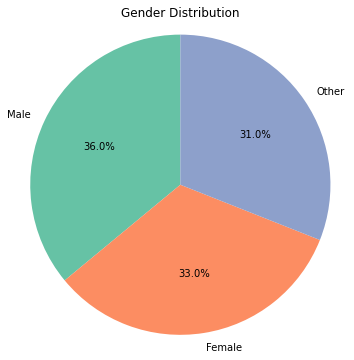

In [16]:
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Gender Distribution")
plt.axis('equal')  # Ensures pie chart is a circle
plt.show()

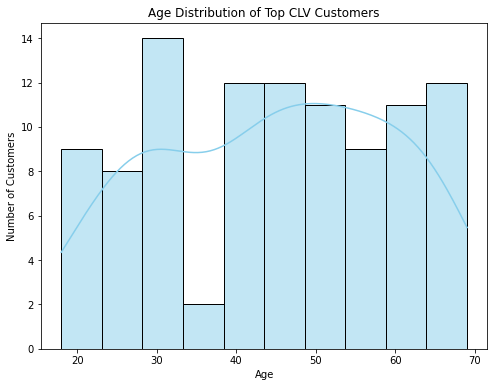

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')

# Add titles and labels
plt.title("Age Distribution of Top CLV Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Show plot
plt.show()

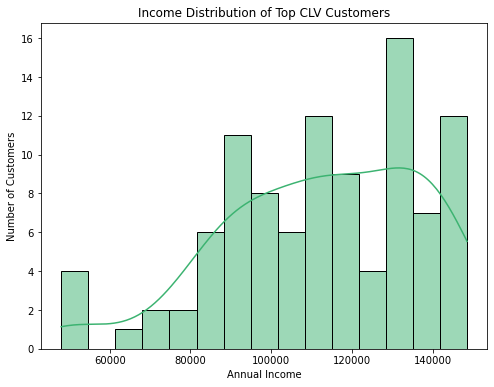

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], bins=15, kde=True, color='mediumseagreen')

# Add titles and labels
plt.title("Income Distribution of Top CLV Customers")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")

# Show plot
plt.show()

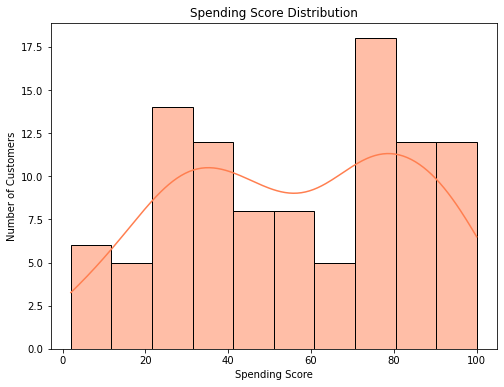

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['spending_score'], bins=10, kde=True, color='coral')

# Add titles and labels
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")
plt.show()

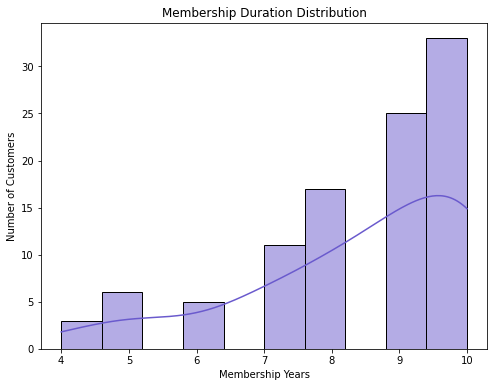

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['membership_years'], bins=10, kde=True, color='slateblue')

# Add titles and labels
plt.title("Membership Duration Distribution")
plt.xlabel("Membership Years")
plt.ylabel("Number of Customers")

# Show plot
plt.show()

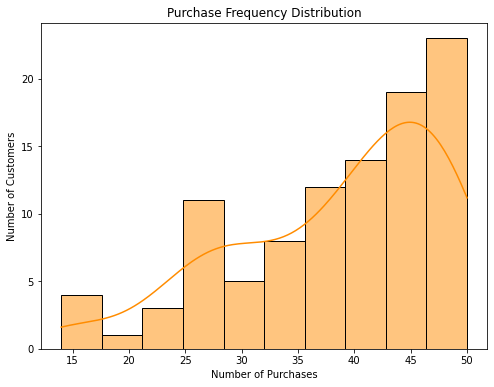

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['purchase_frequency'], bins=10, kde=True, color='darkorange')

# Add titles and labels
plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")

# Show plot
plt.show()

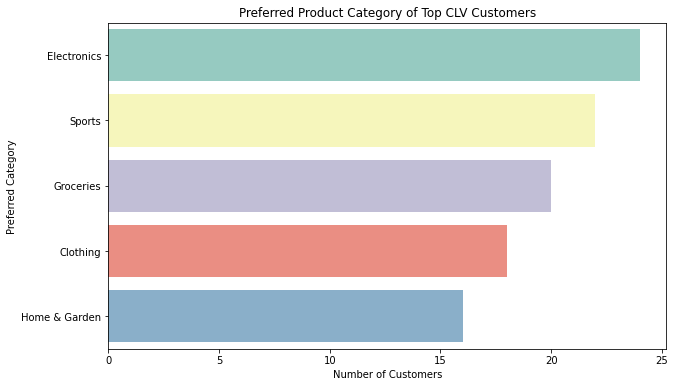

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='preferred_category',
    order=df['preferred_category'].value_counts().index,
    palette='Set3'
)
plt.title("Preferred Product Category of Top CLV Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Preferred Category")
plt.show()

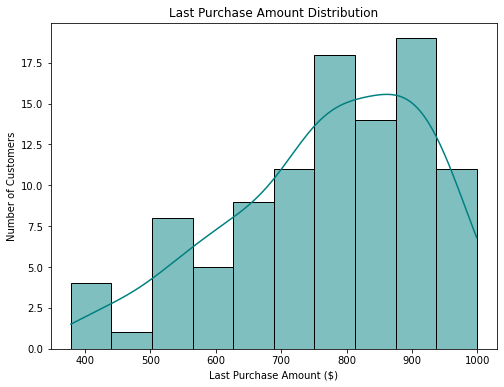

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['last_purchase_amount'], bins=10, kde=True, color='teal')

# Add titles and labels
plt.title("Last Purchase Amount Distribution")
plt.xlabel("Last Purchase Amount ($)")
plt.ylabel("Number of Customers")

# Show plot
plt.show()

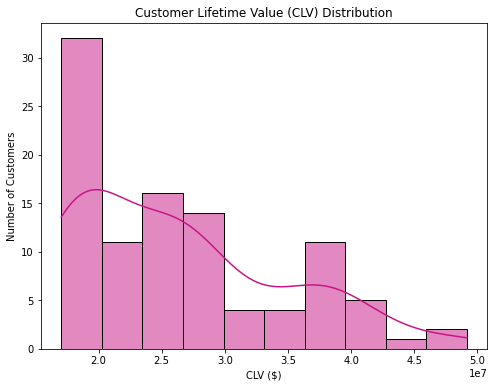

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CLV'], bins=10, kde=True, color='mediumvioletred')
plt.title("Customer Lifetime Value (CLV) Distribution")
plt.xlabel("CLV ($)")
plt.ylabel("Number of Customers")
plt.show()


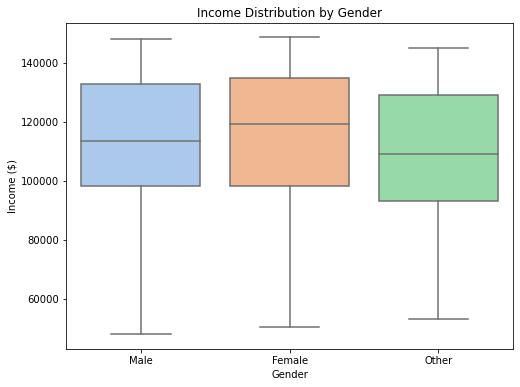

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='income', palette='pastel')
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Income ($)")
plt.show()

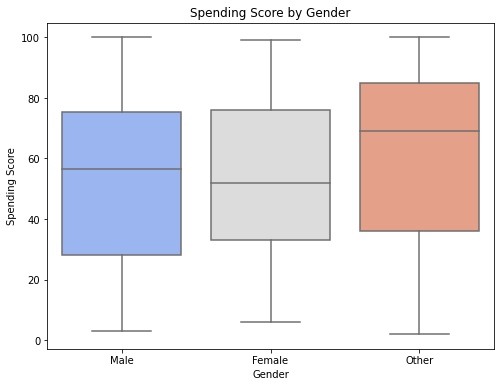

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='spending_score', palette='coolwarm')

# Add titles and labels
plt.title("Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score")

# Show plot
plt.show()

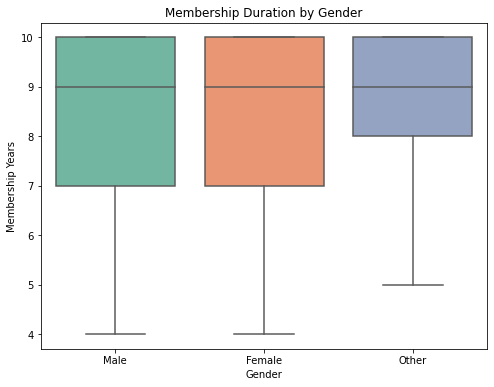

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='membership_years', palette='Set2')

# Add titles and labels
plt.title("Membership Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Membership Years")
plt.show()

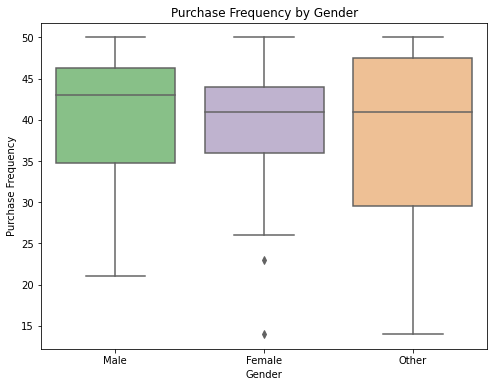

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='purchase_frequency', palette='Accent')

# Add titles and labels
plt.title("Purchase Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Frequency")

# Show plot
plt.show()

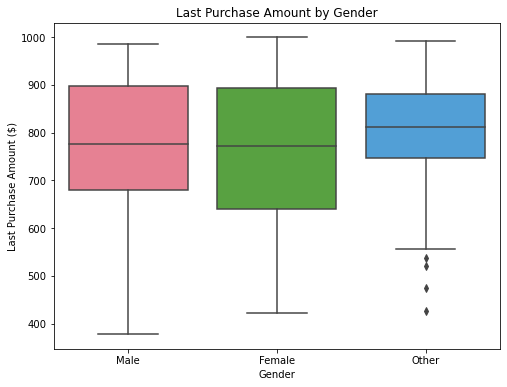

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='last_purchase_amount', palette='husl')

# Add titles and labels
plt.title("Last Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Last Purchase Amount ($)")

# Show plot
plt.show()

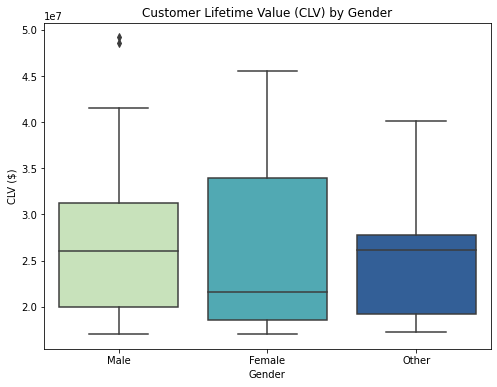

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='CLV', palette='YlGnBu')

# Add titles and labels
plt.title("Customer Lifetime Value (CLV) by Gender")
plt.xlabel("Gender")
plt.ylabel("CLV ($)")

# Show plot
plt.show()

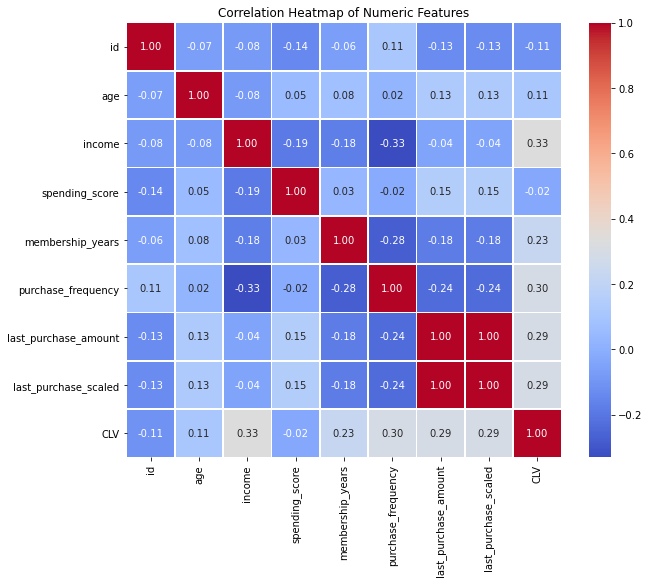

In [31]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use scaled data for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [32]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df[["age", "gender", "spending_score", "income", "membership_years", "last_purchase_amount"]]
y = df["CLV"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model and feature names
with open('model.pkl', 'wb') as f:
    pickle.dump((model, X.columns.tolist()), f)

print("✅ Model trained and saved successfully.")

✅ Model trained and saved successfully.
